<a href="https://colab.research.google.com/github/paulatorres2/Isolation-Forest/blob/main/IsolationForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Primeras filas del dataset:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Willi

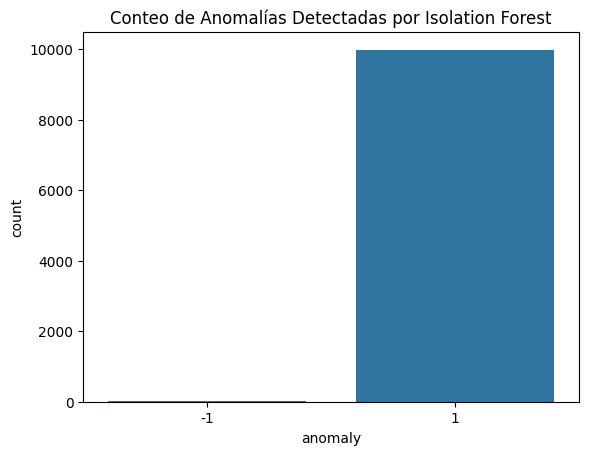

La columna de fraude (target) no está presente en el dataset.


In [1]:
#Conecxion con google drive y librerías
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report


# Cargar el Dataset desde google drive
df = pd.read_csv('/content/drive/MyDrive/fraudTest.csv')
print("Primeras filas del dataset:")
print(df.head())

# Seleccionar una muestra aleatoria de 10000 registros
df_sample = df.sample(n=10000, random_state=42) if len(df) > 10000 else df

# Limpieza y exploracion de datos verificando valores nulos
if df_sample.isnull().sum().sum() == 0:
    print("No hay valores nulos en el dataset.")
else:
    print("Existen valores nulos en el dataset.")

# Preparar los datos
target_column = 'isFraud'
X = df_sample.drop(columns=[target_column, 'Time'], errors='ignore')  # Variable predictoras
y_true = df_sample[target_column] if target_column in df_sample.columns else None  # Variable objetivo real

# Verificar tipos de datos en X
print("Tipos de datos en X antes de limpieza:")
print(X.dtypes)

# Eliminar columnas que no sean numéricas
X = X.select_dtypes(include=[np.number])

print("\nTipos de datos en X después de eliminar columnas no numéricas:")
print(X.dtypes)

# Implementacion de isolation forest

isolation_forest = IsolationForest(contamination=0.0017, random_state=42)
isolation_forest.fit(X)

# Predecir las anomalias
df_sample['anomaly'] = isolation_forest.predict(X)  # 1 = normal, -1 = anomalía

# Grafico de conteo de anomalías detectadas
sns.countplot(x='anomaly', data=df_sample)
plt.title('Conteo de Anomalías Detectadas por Isolation Forest')
plt.show()

# Comparación entre las anomalías detectadas y las transacciones fraudulentas reales
if y_true is not None:
    fraud_vs_detected = pd.crosstab(df_sample[target_column], df_sample['anomaly'], rownames=['Real'], colnames=['Predicción'])
    print("Comparación de fraude real vs. anomalías detectadas:")
    print(fraud_vs_detected)

    # evaluacion del Modelo
    # Conversion de las etiquetas para coincidir con las originales (1 = normal, -1 = anomalía)
    y_pred = df_sample['anomaly'].apply(lambda x: 1 if x == -1 else 0)  # Mapear anomalías como fraude (1)

    print("\nReporte de clasificación:")
    print(classification_report(y_true, y_pred, target_names=['No Fraud', 'Fraud']))
else:
    print("La columna de fraude (target) no está presente en el dataset.")
